In [45]:
import pickle

import datetime
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

import re, string 
import pandas as pd   
from collections import defaultdict
import spacy
from sklearn.manifold import TSNE
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline


In [23]:
disaster_specific = ['hurricaneharvey', 'harvey', 'houston', 'texas']
# custom_stopwords = custom_words + disaster_specific
custom_words = list(set(
    list(ENGLISH_STOP_WORDS) + list(stopwords.words('english')) +
    ['en', 'amp', 'instagram', 'hurricaneharvey', 'harvey', 'houston', 'texas', 'com', 'county', 'org',
     'www', 'https', 'http', 'rt']))


In [16]:
def process_data_by_tweet(file):
    df = pd.read_file(file)
    # convert to lowercase
    self._remove_extraneous(df, custom_stopwords)
    df['cleaned_tweets'] = self._clean_tweets(df['text'])
    df['lemmatized_tweets'] = self._lemmatize_tweets_spacy(df['cleaned_tweets'])
    return df


In [57]:
df = pd.read_csv('/Users/danielgurzi/DSI/submissions/projects/Project_5/workflow/data/hurricaneharvey/processed_datasets/hurricaneharvey_10000.csv')

sentences = [row.split() for row in df['text']]


In [56]:
df.columns

Index(['Unnamed: 0', 'username', 'to', 'text', 'retweets', 'favorites',
       'replies', 'id', 'permalink', 'author_id', 'date', 'formatted_date',
       'hashtags', 'mentions', 'geo', 'urls', 'cleaned_tweets',
       'lemmatized_tweets'],
      dtype='object')

In [69]:
w2v_model = Word2Vec(min_count=200,
                 window=5,
                 size=100,
                 workers=4)

w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_model.iter)
w2v_model.init_sims(replace=True)

n_clusters = 20

kmeans = KMeans(n_clusters=n_clusters).fit(w2v_model)
# lines_for_predicting = ["tf and idf is awesome!", "some androids is there"]
# preds = kmeans.predict(tfidf_vec.transform(lines_for_predicting))
clusters = kmeans.cluster_centers_
current_time = datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S")
# filename = f"../data/mendocinocomplex/kmeans/kmeans_{n_clusters}_{current_time}.pkl"
# with open(filename, 'wb') as file:
#     pickle.dump(kmeans, file)
#     file.close()
df['cluster'] = kmeans.predict(w2v_model)
print(dataframe[['cluster', 'id', 'text']])
# dataframe.to_csv(f"../data/mendocinocomplex/kmeans/mendocinocomplex_{n_clusters}_{current_time}.csv", header=True, index=False)

/Users/danielgurzi/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  import sys


ValueError: setting an array element with a sequence.

In [67]:
w2v_model.wv.most_similar(positive=['trump'])


[('friends', 0.9993607997894287),
 ('people', 0.9993449449539185),
 ('hurricanharvey', 0.9993090629577637),
 ('helping', 0.9993062019348145),
 ('help', 0.9992863535881042),
 ('hope', 0.9992390275001526),
 ('tx', 0.9992221593856812),
 ('prayfortexas', 0.9992190003395081),
 ('affected', 0.9992114305496216),
 ('news', 0.9991976022720337)]

In [42]:
w2v_model.wv.similarity('flood', 'storm')


0.9993781

/Users/danielgurzi/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


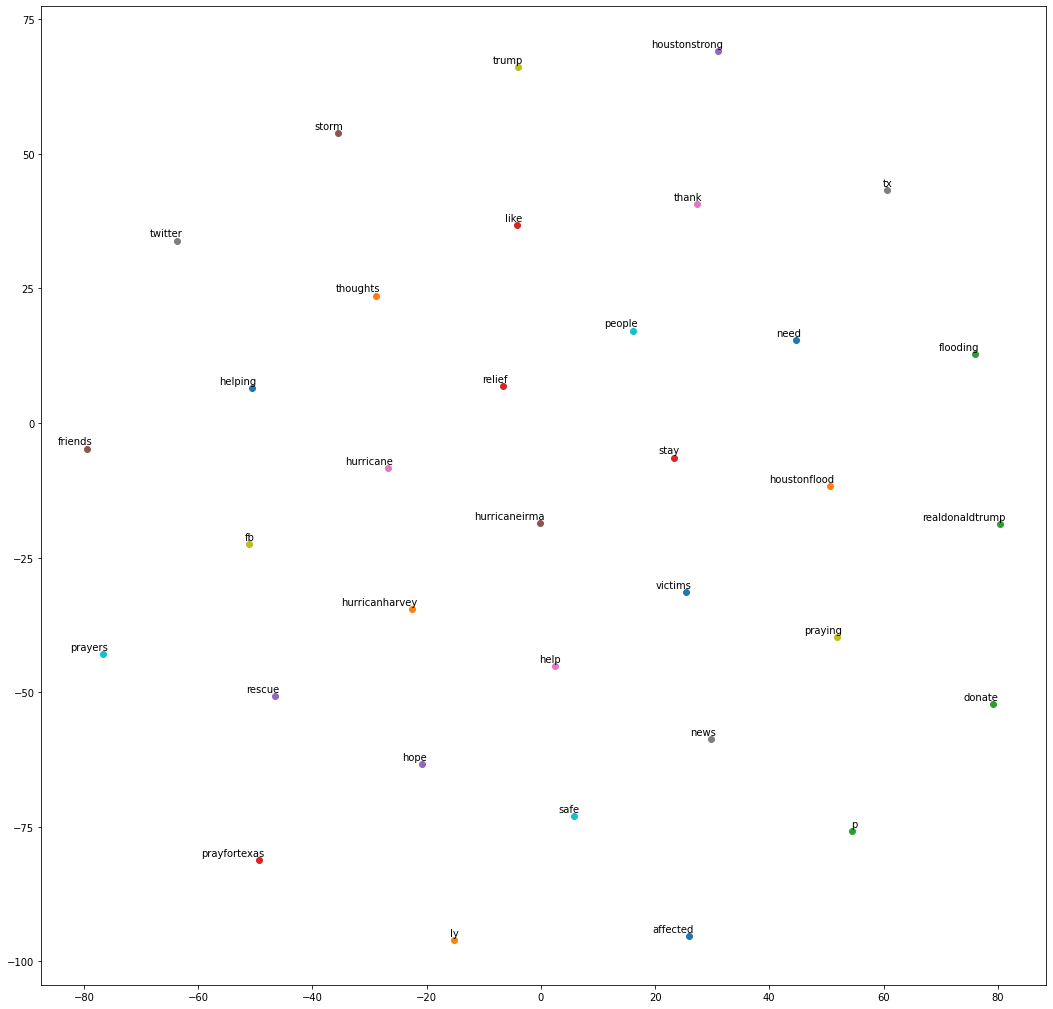

In [60]:
# from https://towardsdatascience.com/understanding-word2vec-embedding-in-practice-3e9b8985953

def tsne_plot(model):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 18)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
   
tsne_plot(w2v_model)

In [71]:
w2v_model.wv.cosine_similarities

<function gensim.models.keyedvectors.WordEmbeddingsKeyedVectors.cosine_similarities(vector_1, vectors_all)>